In [2]:
# ! pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd 

In [4]:
df = pd.read_excel('MCAP31032023_0.xlsx')
sym_comp = df['Symbol']
sym_comp.dropna(inplace=True)
sym_comp.isna().sum()
tickers = []
tickers.extend(sym_comp.values)

In [5]:
# df = yf.download(tickers[1],period='6mo')
# f = open('stocksdata.csv','w')
# df.to_csv('stocksdata.csv')
# f.close()
df = pd.read_csv('stocksdata.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-10,3.15,3.33,3.15,3.32,3.32,249100
1,2023-04-11,3.36,3.57,3.36,3.52,3.52,340800
2,2023-04-12,3.58,3.58,3.32,3.35,3.35,450600
3,2023-04-13,3.33,3.40,3.29,3.36,3.36,233000
4,2023-04-14,3.34,3.40,3.29,3.30,3.30,156200
...,...,...,...,...,...,...,...
121,2023-10-02,2.22,2.28,2.15,2.21,2.21,725700
122,2023-10-03,2.18,2.26,2.15,2.15,2.15,411500
123,2023-10-04,2.16,2.26,2.12,2.18,2.18,395000
124,2023-10-05,2.14,2.17,1.95,2.03,2.03,656100


In [6]:
dic = {'year':[],'month':[],'date':[]}
lth = len(df.Date)
for i in range(lth):
    lst = df.Date[i].split(sep='-')
    dic['date'].append(lst[2])
    dic['month'].append(lst[1])
    dic['year'].append(lst[0])


In [7]:
dft = pd.DataFrame(dic)
dft.index

RangeIndex(start=0, stop=126, step=1)

In [8]:
df['Date'] = pd.to_datetime(dft['date'].astype(str)+'-'+dft['month'].astype(str)+'-'+dft['year'].astype(str),dayfirst=True,infer_datetime_format=True) # feature type is not datetime 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       126 non-null    datetime64[ns]
 1   Open       126 non-null    float64       
 2   High       126 non-null    float64       
 3   Low        126 non-null    float64       
 4   Close      126 non-null    float64       
 5   Adj Close  126 non-null    float64       
 6   Volume     126 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.0 KB
None


## __Time_Series_Analysis__

In [9]:
df.set_index('Date',inplace=True)
print(df.head())
df.tail()

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2023-04-10  3.15  3.33  3.15   3.32       3.32  249100
2023-04-11  3.36  3.57  3.36   3.52       3.52  340800
2023-04-12  3.58  3.58  3.32   3.35       3.35  450600
2023-04-13  3.33  3.40  3.29   3.36       3.36  233000
2023-04-14  3.34  3.40  3.29   3.30       3.30  156200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,2.22,2.28,2.15,2.21,2.21,725700
2023-10-03,2.18,2.26,2.15,2.15,2.15,411500
2023-10-04,2.16,2.26,2.12,2.18,2.18,395000
2023-10-05,2.14,2.17,1.95,2.03,2.03,656100
2023-10-06,2.00,2.19,2.00,2.11,2.11,396200


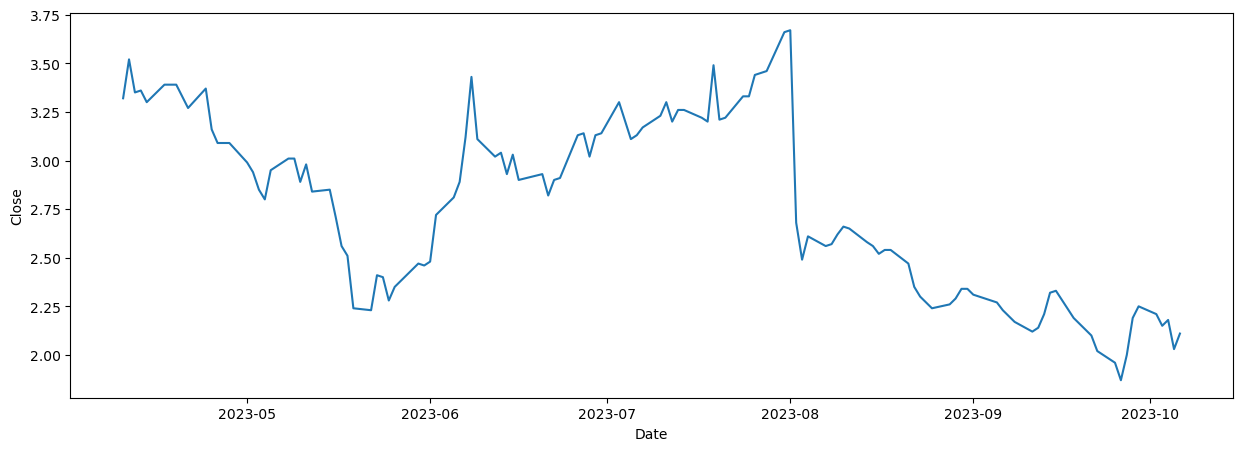

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
plt.show()

In [11]:
# calcaulate the plot of rolling mean and standard deviation
df['rollMean'] = df['Close'].rolling(window=20).mean() ## window = 12 parameter shiftes the time by 12 column
df['rollStd'] = df['Close'].rolling(window=20).std()

In [12]:
print(df['rollMean'])
print(df['rollStd']) # it will take rolling mean after first 12 values

Date
2023-04-10       NaN
2023-04-11       NaN
2023-04-12       NaN
2023-04-13       NaN
2023-04-14       NaN
               ...  
2023-10-02    2.1535
2023-10-03    2.1475
2023-10-04    2.1450
2023-10-05    2.1365
2023-10-06    2.1335
Name: rollMean, Length: 126, dtype: float64
Date
2023-04-10         NaN
2023-04-11         NaN
2023-04-12         NaN
2023-04-13         NaN
2023-04-14         NaN
                ...   
2023-10-02    0.117665
2023-10-03    0.114426
2023-10-04    0.113067
2023-10-05    0.115087
2023-10-06    0.114950
Name: rollStd, Length: 126, dtype: float64


In [13]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,rollMean,rollStd
Date,,,,,,,,
2023-04-10,3.15,3.33,3.15,3.32,3.32,249100,NaN,NaN
2023-04-11,3.36,3.57,3.36,3.52,3.52,340800,NaN,NaN
2023-04-12,3.58,3.58,3.32,3.35,3.35,450600,NaN,NaN
2023-04-13,3.33,3.40,3.29,3.36,3.36,233000,NaN,NaN
2023-04-14,3.34,3.40,3.29,3.30,3.30,156200,NaN,NaN


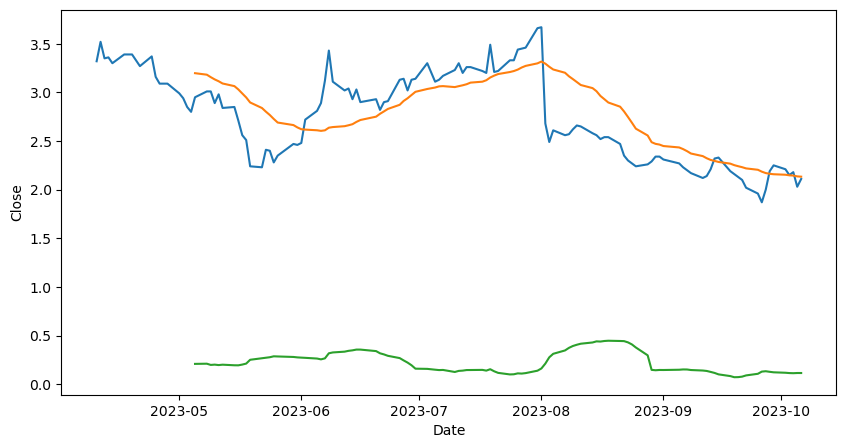

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
sns.lineplot(data=df,x=df.index,y=df['rollMean'])
sns.lineplot(data=df,x=df.index,y=df['rollStd'])
plt.show()

In [15]:
# conclusion : Mean is not stationary , SD is not stationary; so our data is not stationary
# Now let us perform the ADF test 

In [16]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['Close'])
adfTest
# Interpret these value below by converting into series

(-1.6076202173273868,
 0.4797645847293316,
 0,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 -116.88975073399331)

In [17]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
stats

Test Statistics           -1.607620
p-value                    0.479765
#lags used                 0.000000
number of observation    125.000000
dtype: float64

In [18]:
for key, values in adfTest[4].items():
    print('critically',key,':',values)

critically 1% : -3.4837793736959997
critically 5% : -2.88495387648
critically 10% : -2.579256976


In [19]:
def test_stationary(df,var):
    df['rollMean'] = df[var].rolling(window=12).mean() ## window = 12 parameter shiftes the time by 12 column
    df['rollStd'] = df[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var])
    stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
    print(stats)
    for key, values in adfTest[4].items():
        print('critically',key,':',values)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(data=df,x=df.index,y='rollMean')
    sns.lineplot(data=df,x=df.index,y='rollStd')
    plt.show()

Test Statistics           -1.607620
p-value                    0.479765
#lags used                 0.000000
number of observation    125.000000
dtype: float64
critically 1% : -3.4837793736959997
critically 5% : -2.88495387648
critically 10% : -2.579256976


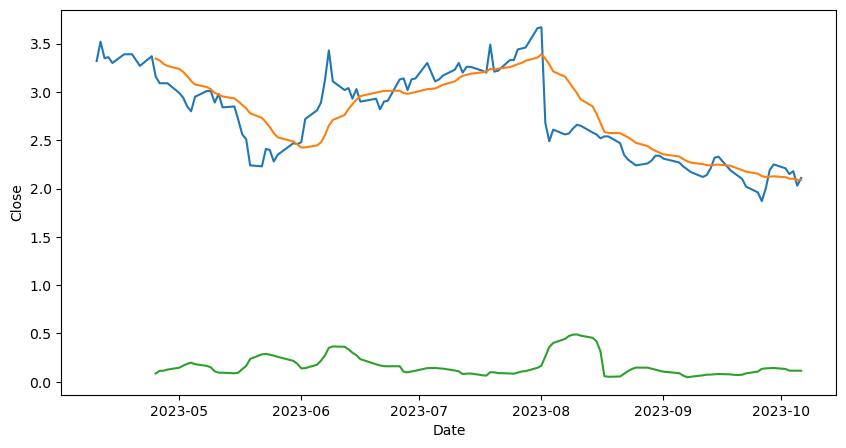

In [20]:
test_stationary(df,'Close')

In [21]:
tcs_df = df[['Close']].copy() # double bracket cuz its list within a list
tcs_df.head()

,Close
Date,
2023-04-10,3.32
2023-04-11,3.52
2023-04-12,3.35
2023-04-13,3.36
2023-04-14,3.30


In [22]:
def shift(x):
    tcs_df = df[['Close']].copy()
    tcs_df['shift'] = tcs_df.Close.shift(x) # create a new column which will contain shifted value from Close 
    tcs_df['shiftDiff'] = tcs_df['Close'] - tcs_df['shift']
    # print(tcs_df.sample(20))
    shifted_Data = tcs_df.dropna()
    return shifted_Data

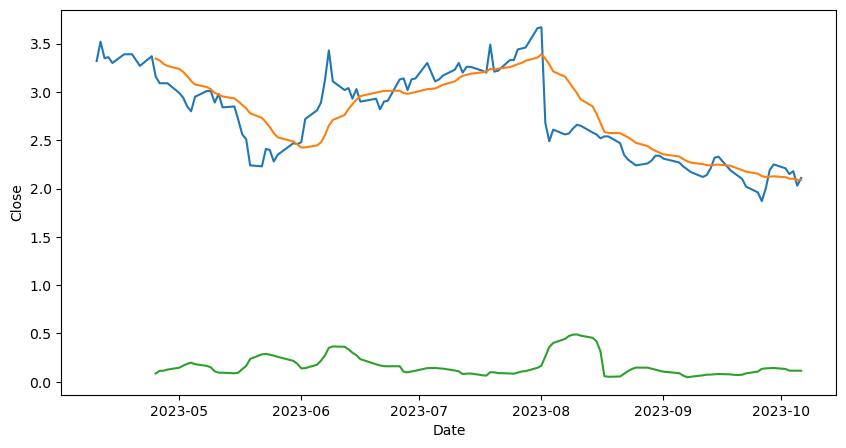

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
sns.lineplot(data=df,x=df.index,y=df['rollMean'])
sns.lineplot(data=df,x=df.index,y=df['rollStd'])
plt.show()

In [24]:
shifted_Data = shift(4)
shifted_Data

,Close,shift,shiftDiff
Date,,,
2023-04-14,3.30,3.32,-0.02
2023-04-17,3.39,3.52,-0.13
2023-04-18,3.39,3.35,0.04
2023-04-19,3.39,3.36,0.03
2023-04-20,3.33,3.30,0.03
...,...,...,...
2023-10-02,2.21,1.87,0.34
2023-10-03,2.15,2.00,0.15
2023-10-04,2.18,2.19,-0.01


Test Statistics           -2.587016
p-value                    0.095711
#lags used                13.000000
number of observation    108.000000
dtype: float64
critically 1% : -3.4924012594942333
critically 5% : -2.8886968193364835
critically 10% : -2.5812552709190673


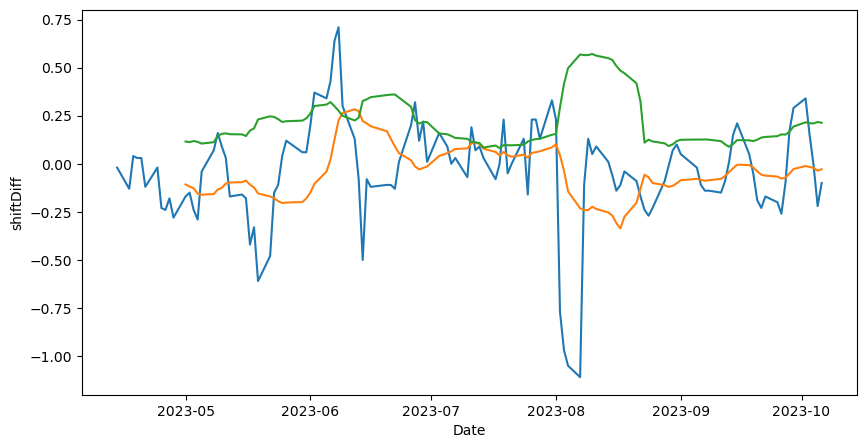

In [25]:
test_stationary(shifted_Data,'shiftDiff')

# Interpret these value below by converting into series

### __ARIMA__

In [26]:
tcs = df[['Close']].copy(deep=True)
tcs['FirstDiff'] = tcs[['Close']].diff(1) # for ARIMA
#tcs['FirstDiff'] = tcs[['Close']].diff(12) # for

In [27]:
print(tcs.head())

            Close  FirstDiff
Date                        
2023-04-10   3.32        NaN
2023-04-11   3.52       0.20
2023-04-12   3.35      -0.17
2023-04-13   3.36       0.01
2023-04-14   3.30      -0.06


In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

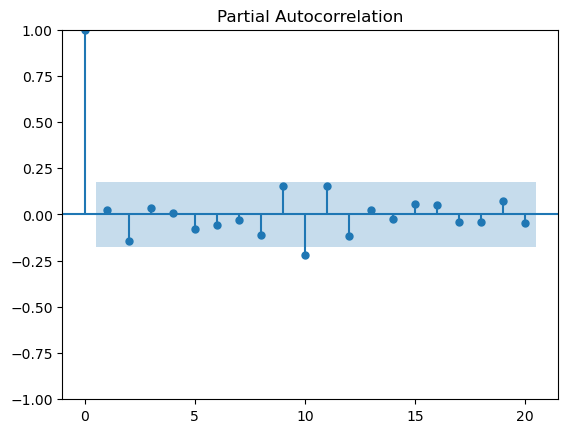

In [29]:
plot_pacf(tcs['FirstDiff'].dropna(),lags=20)
plt.show()

* the shaded area is insignificant area
* PACF gives us the auto regressive values
* frist 'p' is 1 (the axis co-ordinate), whoes value is ~0.31 (the y-axis co-ordinate)
* so, significant P values are 1 ,2 ,3, 4, etc  

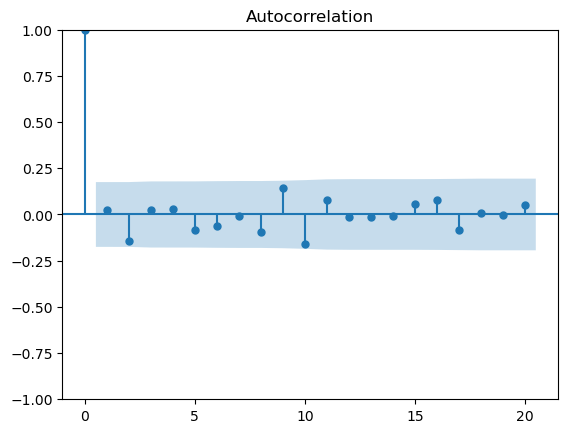

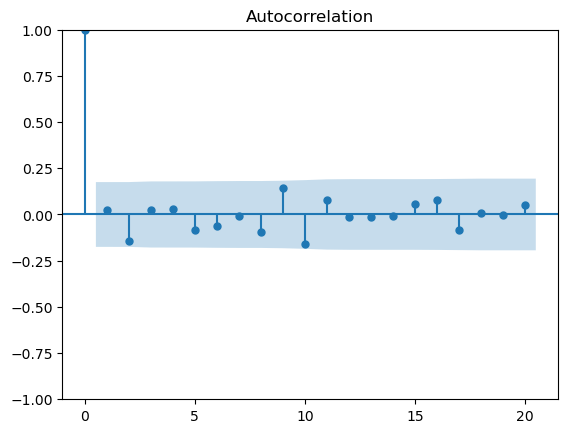

In [30]:
plot_acf(tcs['FirstDiff'].dropna(),lags=20)

In [31]:
tcs.sort_index()

,Close,FirstDiff
Date,,
2023-04-10,3.32,NaN
2023-04-11,3.52,0.20
2023-04-12,3.35,-0.17
2023-04-13,3.36,0.01
2023-04-14,3.30,-0.06
...,...,...
2023-10-02,2.21,-0.04
2023-10-03,2.15,-0.06
2023-10-04,2.18,0.03


            Close  FirstDiff
Date                        
2023-08-08   2.57       0.01
2023-08-09   2.62       0.05
2023-08-10   2.66       0.04
2023-08-11   2.65      -0.01
2023-08-14   2.58      -0.07
            Close  FirstDiff
Date                        
2023-08-15   2.56      -0.02
2023-08-16   2.52      -0.04
2023-08-17   2.54       0.02
2023-08-18   2.54       0.00
2023-08-21   2.47      -0.07


c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\q\anaconda3

            Close  FirstDiff  \
Date                           
2023-10-02   2.21      -0.04   
2023-10-03   2.15      -0.06   
2023-10-04   2.18       0.03   
2023-10-05   2.03      -0.15   
2023-10-06   2.11       0.08   

                                                    arimaPred  
Date                                                           
2023-10-02  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-03  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-04  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-05  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-06  <statsmodels.tsa.statespace.mlemodel.Predictio...  


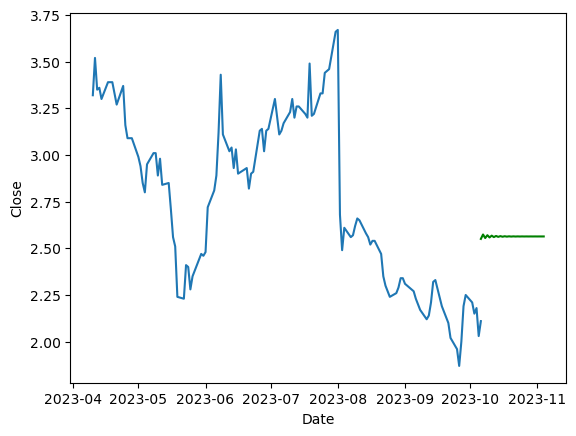

In [32]:
# Results of ACF are similar to that of PACF
# Interpretation: We got q. Significant q values are 1, 3, 4, 8, etc) 

# Let us take p = 1, q = 3 (both are significant) and d = 1 (already known)

# Build ARIMA model
train = tcs[:round(len(tcs)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

test = tcs[round(len(tcs)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

model = ARIMA(train['Close'],order=(1,1,1)) # Parameters: p, d, q
model_fit = model.fit()
# prediction = model_fit.predict(start=test.index[0],end=test.index[-1], freq = None)
prediction = model_fit.get_forecast(steps = 30 , exog = df.iloc[-30:]['Close'])
tcs['arimaPred'] = prediction
print(tcs.tail())

# Plot

sns.lineplot(data=tcs,x=tcs.index,y='Close')
# sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
plt.plot(pd.date_range(start = df.index[-1],periods = 30 , freq = 'd'),prediction.predicted_mean , label = "test",color = 'Green')
plt.show()

# Conclusion: The ARIMA prediction is not good



In [33]:
# test.Date['2022-11-11']

            Close
Date             
2023-04-10   3.32
2023-04-11   3.52
2023-04-12   3.35
2023-04-13   3.36
2023-04-14   3.30


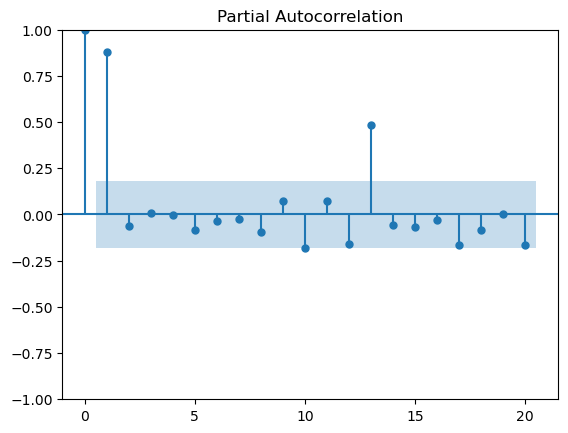

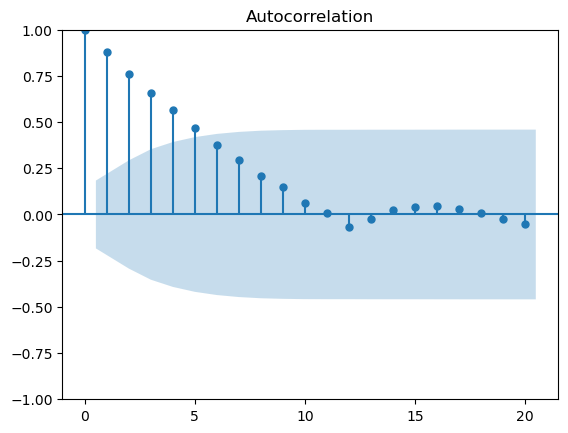

In [34]:
tcs = df[['Close']].copy(deep=True)
print(tcs.head())

# Create columns for one month and one year lagged data
tcs['firstDiff'] = tcs['Close'].diff()
tcs['Diff12'] = tcs['Close'].diff(12) # This will show nulls to start with

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(tcs['Diff12'].dropna(),lags=20)
plt.show() 

plot_acf(tcs['Diff12'].dropna(),lags=20)
plt.show()

In [43]:
train = tcs[:round(len(tcs)*70/100)] # Take the first 70% data
test = tcs[round(len(tcs)*70/100):] # Take the last 30% data, starting from 71%

# First ARIMA prediction
# model = ARIMA(train['Clorediction = model_fit.predict(start=test.index[0],end=test.index[-1])
# tcs['sarimaxPred'] = prediction
# print(tcs.tail()),order=(3,1,3)) # Parameters: p, d, q
# model_fit = model.fit()
# prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
# tcs['arimaPred'] = prediction

# Now SARIMAX prediction
model = SARIMAX(train['Close'],order=(1,1,1),seasonal_order=(3,1,5,10))
model_fit = model.fit()
# prediction = model_fit.predict(start=test.index[1],end=test.index[-1])
prediction = model_fit.get_forecast(steps = 60 , exog = df.iloc[-30:]['Close'])
tcs['sarimaxPred'] = prediction
print(tcs.tail())

c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


            Close  firstDiff  Diff12  \
Date                                   
2023-10-02   2.21      -0.04   -0.11   
2023-10-03   2.15      -0.06   -0.18   
2023-10-04   2.18       0.03   -0.01   
2023-10-05   2.03      -0.15   -0.13   
2023-10-06   2.11       0.08   -0.02   

                                                  sarimaxPred  
Date                                                           
2023-10-02  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-03  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-04  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-05  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-06  <statsmodels.tsa.statespace.mlemodel.Predictio...  


c:\Users\q\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
tcs

,Close,firstDiff,Diff12,sarimaxPred
Date,,,,
2023-04-10,3.32,NaN,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-04-11,3.52,0.20,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-04-12,3.35,-0.17,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-04-13,3.36,0.01,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-04-14,3.30,-0.06,NaN,<statsmodels.tsa.statespace.mlemodel.Predictio...
...,...,...,...,...
2023-10-02,2.21,-0.04,-0.11,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-10-03,2.15,-0.06,-0.18,<statsmodels.tsa.statespace.mlemodel.Predictio...
2023-10-04,2.18,0.03,-0.01,<statsmodels.tsa.statespace.mlemodel.Predictio...


            Close  firstDiff  Diff12  \
Date                                   
2023-04-10   3.32        NaN     NaN   
2023-04-11   3.52       0.20     NaN   
2023-04-12   3.35      -0.17     NaN   
2023-04-13   3.36       0.01     NaN   
2023-04-14   3.30      -0.06     NaN   

                                                  sarimaxPred  
Date                                                           
2023-04-10  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-04-11  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-04-12  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-04-13  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-04-14  <statsmodels.tsa.statespace.mlemodel.Predictio...  


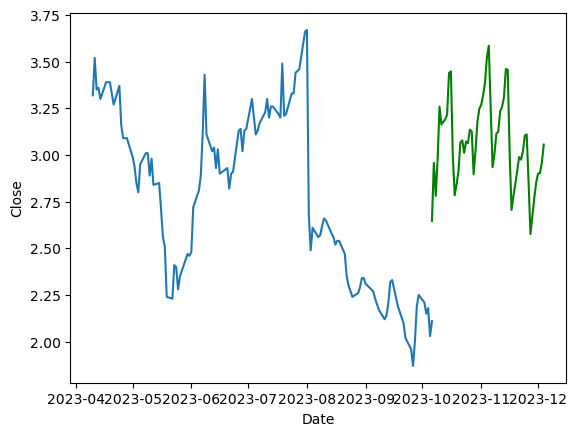

In [45]:
# Data looks better

# Plot
tcs.dropna()
print(tcs.head())
sns.lineplot(data=tcs,x=tcs.index,y='Close')
plt.plot(pd.date_range(start = df.index[-1],periods = 60 , freq = 'd'),prediction.predicted_mean , label = "test",color = 'Green')
# sns.lineplot(data=tcs,x=tcs.index,y='sarimaxPred')
# sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
plt.show()

In [59]:
# Compared to ARIMA, SARIMAX is much better

# Future prediction

# First check the last date in our dataset
print(tcs.tail())

# MS: Month Start frequency
# Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='2023-01-07', end='2023-10-09',freq='D'),columns=['Dates'])
# futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

# Predict and print
predict = model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])
print(predict)

            Close  firstDiff  Diff12  \
Date                                   
2023-10-02   2.21      -0.04   -0.11   
2023-10-03   2.15      -0.06   -0.18   
2023-10-04   2.18       0.03   -0.01   
2023-10-05   2.03      -0.15   -0.13   
2023-10-06   2.11       0.08   -0.02   

                                                  sarimaxPred  
Date                                                           
2023-10-02  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-03  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-04  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-05  <statsmodels.tsa.statespace.mlemodel.Predictio...  
2023-10-06  <statsmodels.tsa.statespace.mlemodel.Predictio...  
       Dates
0 2023-01-07
1 2023-01-08
2 2023-01-09
3 2023-01-10
4 2023-01-11
0      0.000000
1      3.320000
2      3.520000
3      3.350000
4      3.360000
         ...   
271    1.441806
272    1.535128
273    1.596894
274    1.661727
275    1.670222
Name: predicted_m

c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


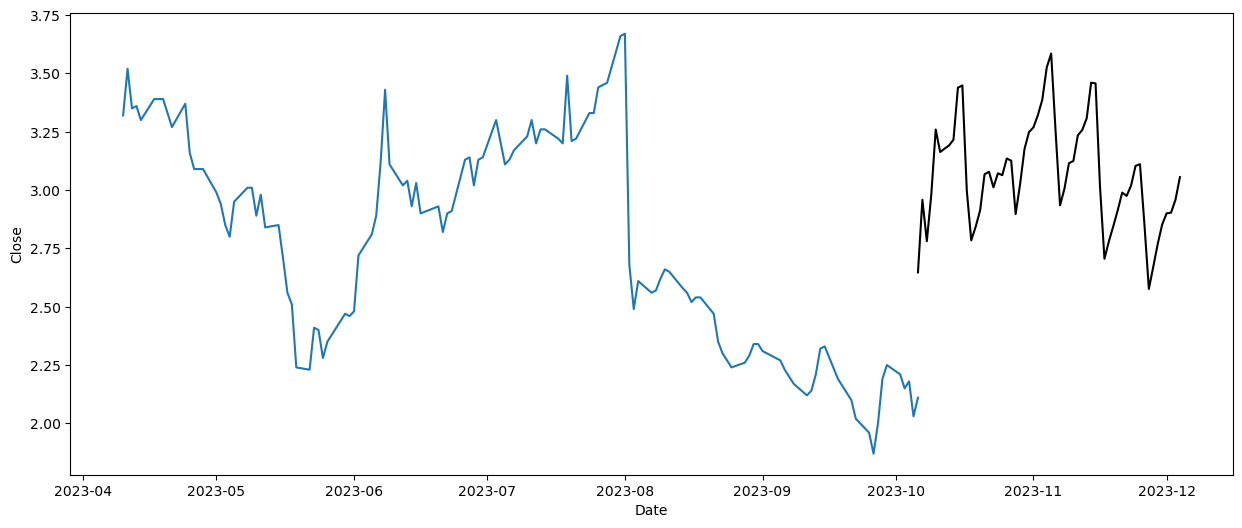

In [75]:

# Plot

tcs.dropna()
plt.figure(figsize=(15,6))
sns.lineplot(data=tcs,x=tcs.index,y='Close')
plt.plot(pd.date_range(start = df.index[-1],periods = 60 , freq = 'd'),prediction.predicted_mean , label = "test",color = 'Black')
# sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
# model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1],step = 30).plot(color='black')
plt.show()


datetime.date(2023, 1, 7)